## Early Stopping

* Can automatically stop training based on a loss condition on the validation data passed     during the model.fit() call.

## Dropout Layers

* Dropout can be added to layers to turn off neurons during training to prevent overfitting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv('~/Documents/Deep Learning Masterclass/DATA/cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

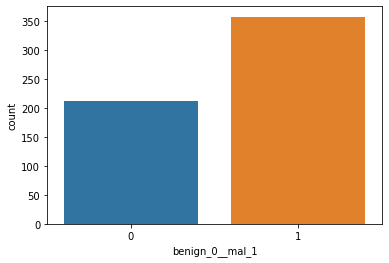

In [5]:
sbn.countplot(data=df, x='benign_0__mal_1')

In [8]:
df.corr()['benign_0__mal_1'].sort_values(ascending=False)[1: ]

smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0.776454
mean concave points       -0

In [9]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(426, 30)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary classification

model.compile('adam', 'binary_crossentropy')

In [17]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600)

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6548 - val_loss: 0.6234
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6090 - val_loss: 0.5801
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5634 - val_loss: 0.5316
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5127 - val_loss: 0.4734
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4552 - val_loss: 0.4141
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4056 - val_loss: 0.3553
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3528 - val_loss: 0.3123
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3141 - val_loss: 0.2776
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2844 - val_loss: 0.2513
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2604 - val_loss: 0.2289
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.1155
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0540 - val_loss: 0.1097
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0565 - val_loss: 0.1097
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0539 - val_loss: 0.1113
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1099
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0545 - val_loss: 0.1195
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0527 - val_loss: 0.1141
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.1091
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - val_loss: 0.1190
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.1124


14/14 [==============================] - 0s 3ms/step - loss: 0.0428 - val_loss: 0.1343
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.1200
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0448 - val_loss: 0.1392
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0418 - val_loss: 0.1228
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.1283
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0438 - val_loss: 0.1398
Epoch 170/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1303
Epoch 171/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0441 - val_loss: 0.1317
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0413 - val_loss: 0.1247
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 0.1272
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0333 - val_loss: 0.1332
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0352 - val_loss: 0.1423
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.1372
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0353 - val_loss: 0.1526
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1365
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0332 - val_loss: 0.1363
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1371
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0345 - val_loss: 0.1396
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.1495
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.1367
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0259 - val_loss: 0.1489
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.1597
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.1524
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.1504
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.1613
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0258 - val_loss: 0.1597
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0299 - val_loss: 0.1930
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.1450
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.1535
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0272 - val_loss: 0.1815
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1722
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.2033
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.1642
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.2081
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.1677
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.1885
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.1747
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0197 - val_loss: 0.1965
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.1738
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1978
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.2180
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.2089
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.2760
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.2072
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.2167
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.1959
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0216 - val_loss: 0.2241
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.2131
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.2215
Epoch 497/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0152 - val_loss: 0.2218
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0121 - val_loss: 0.2857
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.2489
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.2461
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.2648
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.2572
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0132 - val_loss: 0.2541
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.2808
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.2377
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0107 - val_loss: 0.2763
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0109 - val_loss: 0.2593
Epoc

<AxesSubplot:>

<Figure size 600x400 with 0 Axes>

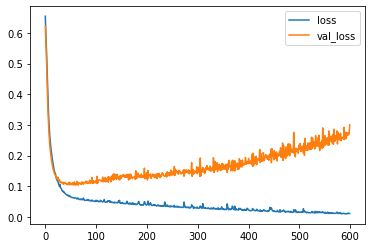

In [20]:
# CASE OF OVERFITTING
plt.figure(dpi=100)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Using Callbacks to Prevent Overfitting

In [21]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Binary classification

model.compile('adam', 'binary_crossentropy')

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) 
# Mode = min means we are trying to minimize the val loss
# We will wait 25 epochs even after stopping condition has been met

model.fit(
    x=X_train, 
    y=y_train, 
    validation_data=(X_test, y_test), 
    epochs=600,
    callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6769 - val_loss: 0.6610
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6501 - val_loss: 0.6386
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6228 - val_loss: 0.6081
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5879 - val_loss: 0.5677
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5434 - val_loss: 0.5194
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4959 - val_loss: 0.4696
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4476 - val_loss: 0.4188
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4018 - val_loss: 0.3726
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3592 - val_loss: 0.3308
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3228 - val_loss: 0.2985
Epoch 11

<AxesSubplot:>

<Figure size 600x400 with 0 Axes>

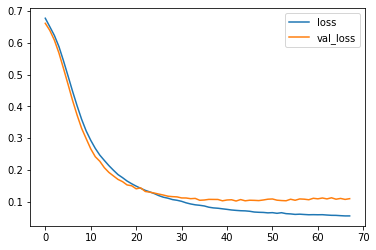

In [25]:
plt.figure(dpi=100)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Using Dropout Layers to Prevent Overfitting

In conjunction with early stopping

In [27]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
# Randomly selected half of all the neurons during each epoch will be turned off

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy')

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) 
# Mode = min means we are trying to minimize the val loss
# We will wait 25 epochs even after stopping condition has been met

model.fit(
    x=X_train, 
    y=y_train, 
    validation_data=(X_test, y_test), 
    epochs=600,
    callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6919 - val_loss: 0.6774
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6799 - val_loss: 0.6644
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6667 - val_loss: 0.6510
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6576 - val_loss: 0.6326
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6438 - val_loss: 0.6113
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6421 - val_loss: 0.5925
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6082 - val_loss: 0.5680
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5929 - val_loss: 0.5353
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5704 - val_loss: 0.5037
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5441 - val_loss: 0.4722
Epoch 11

Epoch 83/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1082 - val_loss: 0.1077
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1360 - val_loss: 0.0999
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1299 - val_loss: 0.0984
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1347 - val_loss: 0.0972
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1196 - val_loss: 0.0912
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1151 - val_loss: 0.0966
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0990 - val_loss: 0.0902
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1375 - val_loss: 0.1037
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1106 - val_loss: 0.1003
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1014 - val_loss: 0.0909


<AxesSubplot:>

<Figure size 600x400 with 0 Axes>

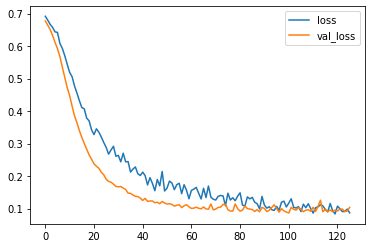

In [29]:
plt.figure(dpi=100)
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Examining Performance of Model

In [35]:
# model.predict_classes(X_test) [[DEPRECATED]]

predictions = (model.predict(X_test) > 0.5).astype("int32")

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
